# Генерация датасета

In [1]:
import random # очевидно
import numpy as np # Более сложный рандом
import pandas as pd # таблички
from config import data_size # количество примеров
from bdorch import cor # визуализация

In [2]:
# Генерация всех признаков

n_samples = data_size
data = {
    'Возраст': [],
    'Пол': [],
    'В браке': [],
    'Количество детей': [],
    'Уровень образования': [],
    'Доход в месяц': [],
    'Тип занятости': [],
    'Стаж на текущем месте работы (лет)': [],
    'Общий трудовой стаж (лет)': [],
    'Тип жилья': [],
    'Наличие автомобиля': [],
    'Количество кредитов': [],
    'Сумма текущего кредита': [],
    'Кредитная история (кол-во просрочек)': [],
    'Максимальная просрочка по кредиту (дней)': [],
    'Количество судимостей': [],
    'Наличие иждивенцев': [],
    'Расходы в месяц': [],
    'Наличие банковских вкладов': [],
    'Страхование жизни': [],
    'Частота смены места работы за последние 5 лет': [],
    'Наличие других займов (например, микрозаймы)': [],
    'Наличие загранпаспорта': [],
    'Частота поездок за границу за последние 5 лет': [],
    'Наличие недвижимости кроме основного жилья': [],
    'Оценка стоимости всего имущества': [],
    'Уровень финансовой грамотности': [],
    'Платеж по текущему кредиту в месяц': [],
    'Количество сданных лаб по информатике': [],
}

for i in range(n_samples):
    data["Возраст"].append(random.randint(18, 70))
    data["Пол"].append(random.choice(["Мужчина", "Женщина"]))
    data["В браке"].append(random.choice(["Нет", "Да"]))
    data["Количество детей"].append(random.randint(0, 20))
    data["Уровень образования"].append(random.choice(['Нет',
                                                      'Школа - 9',
                                                      'Школа - 11',
                                                      'Колледж',
                                                      'Бакалавр',
                                                      'Магистр / Спец',
                                                      'Аспирант',
                                                      'Доктор наук']))
    data["Доход в месяц"].append(random.randint(1, 10000) * 1000)
    data["Тип занятости"].append(random.choice(['Нет работы', 'Самозанятый', 'ИП', 'Постоянная работа', 'ООО']))
    data["Общий трудовой стаж (лет)"].append(random.randint(0, abs(data["Возраст"][-1] - 18)))

    data["Стаж на текущем месте работы (лет)"].append(random.randint(0, data["Общий трудовой стаж (лет)"][-1]))
    data["Тип жилья"].append(random.choice(["Арендованное", "Ипотека", "Собственное"]))
    data["Наличие автомобиля"].append(random.choice(["Нет", "Да"]))
    data["Количество кредитов"].append(random.randint(0, 10))
    data["Сумма текущего кредита"].append(random.randint(1, 10000) * 1000)
    data["Кредитная история (кол-во просрочек)"].append(random.randint(0, 20))
    data["Максимальная просрочка по кредиту (дней)"].append(random.randint(0, 20) * 15)
    data["Количество судимостей"].append(random.randint(0, 10))
    data["Наличие иждивенцев"].append(random.randint(0, 10))
    data["Расходы в месяц"].append(random.randint(15, 400) * 1000)
    data["Наличие банковских вкладов"].append(random.choice(["Нет", "Да"]))
    data["Страхование жизни"].append(random.choice(["Нет", "Да"]))
    data["Частота смены места работы за последние 5 лет"].append(random.randint(0, 10))
    data["Наличие других займов (например, микрозаймы)"].append(random.randint(0, 10))
    data["Наличие загранпаспорта"].append(random.choice(["Нет", "Да"]))
    data["Частота поездок за границу за последние 5 лет"].append(random.randint(0, 20))
    data["Наличие недвижимости кроме основного жилья"].append(random.randint(0, 10))
    data["Оценка стоимости всего имущества"].append(random.randint(0, 50000) * 1000)
    data["Уровень финансовой грамотности"].append(random.choice(["Низкий", "Средний", "Высокий"]))
    data["Платеж по текущему кредиту в месяц"].append(random.randint(3, 100) * 1000)
    data["Количество сданных лаб по информатике"].append(random.randint(0, 4))

data["Доход в месяц"] = np.clip(np.random.normal(loc=100, scale=20, size=n_samples).astype(int), 20, 3000) * 1000
data["Оценка стоимости всего имущества"] = np.clip(np.random.normal(loc=8000, scale=3000, size=n_samples).astype(int),
                                                   1,
                                                   100000) * 1000
data["Количество детей"] = np.clip(np.random.normal(loc=2, scale=2, size=n_samples).astype(int), 0, 10)
data["Кредитная история (кол-во просрочек)"] = np.clip(np.random.normal(loc=2, scale=2, size=n_samples).astype(int), 0,
                                                       10)

df = pd.DataFrame(data)
df.to_csv('data.csv', index=False)
old_data = df.copy()
old_data

,Возраст,Пол,В браке,Количество детей,Уровень образования,Доход в месяц,Тип занятости,Стаж на текущем месте работы (лет),Общий трудовой стаж (лет),Тип жилья,...,Страхование жизни,Частота смены места работы за последние 5 лет,"Наличие других займов (например, микрозаймы)",Наличие загранпаспорта,Частота поездок за границу за последние 5 лет,Наличие недвижимости кроме основного жилья,Оценка стоимости всего имущества,Уровень финансовой грамотности,Платеж по текущему кредиту в месяц,Количество сданных лаб по информатике
0,47,Женщина,Да,2,Колледж,79000,ООО,6,24,Ипотека,...,Нет,10,3,Нет,2,3,5965000,Высокий,21000,3
1,20,Женщина,Нет,6,Школа - 11,89000,ИП,0,1,Арендованное,...,Да,3,10,Да,12,10,9143000,Средний,4000,3
2,33,Женщина,Нет,6,Колледж,121000,Нет работы,1,2,Арендованное,...,Нет,10,9,Нет,19,8,4899000,Средний,30000,4
3,60,Женщина,Нет,1,Школа - 11,106000,ИП,9,42,Арендованное,...,Нет,5,4,Нет,17,6,9208000,Низкий,98000,2
4,33,Мужчина,Да,1,Нет,88000,ИП,12,12,Арендованное,...,Нет,1,5,Да,18,10,7882000,Средний,22000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,70,Мужчина,Да,4,Аспирант,102000,ООО,13,32,Арендованное,...,Да,5,8,Нет,4,2,7593000,Высокий,61000,0
9996,23,Мужчина,Нет,2,Колледж,135000,ИП,1,4,Арендованное,...,Да,3,6,Да,12,6,8887000,Средний,71000,2
9997,22,Женщина,Да,2,Нет,70000,ИП,1,3,Ипотека,...,Да,9,9,Нет,18,5,11288000,Средний,50000,2
9998,34,Женщина,Да,0,Школа - 11,118000,Постоянная работа,3,7,Собственное,...,Нет,0,0,Нет,12,4,13918000,Низкий,68000,4


In [3]:
# Перевод в числовые признаки

df = pd.read_csv('data.csv')
df = pd.get_dummies(df, columns=['Пол'])

yn_col = ["В браке", "Наличие автомобиля", "Наличие банковских вкладов", "Страхование жизни", "Наличие загранпаспорта"]

for i in yn_col:
    df[i] = df[i].map({'Нет': 0, 'Да': 1})

edu_levels = ['Нет',
              'Школа - 9',
              'Школа - 11',
              'Колледж',
              'Бакалавр',
              'Магистр / Спец',
              'Аспирант',
              'Доктор наук']

works = ['Нет работы', 'Самозанятый', 'ИП', 'Постоянная работа', 'ООО']

live = ["Арендованное", "Ипотека", "Собственное"]

finance = ["Низкий", "Средний", "Высокий"]

df['Уровень образования'] = df['Уровень образования'].map({edu_levels[i]: i for i in range(len(edu_levels))})
df['Тип занятости'] = df['Тип занятости'].map({works[i]: i for i in range(len(works))})
df['Тип жилья'] = df['Тип жилья'].map({live[i]: i for i in range(len(live))})
df['Уровень финансовой грамотности'] = df['Уровень финансовой грамотности'].map(
    {finance[i]: i for i in range(len(finance))})


In [4]:
df

,Возраст,В браке,Количество детей,Уровень образования,Доход в месяц,Тип занятости,Стаж на текущем месте работы (лет),Общий трудовой стаж (лет),Тип жилья,Наличие автомобиля,...,"Наличие других займов (например, микрозаймы)",Наличие загранпаспорта,Частота поездок за границу за последние 5 лет,Наличие недвижимости кроме основного жилья,Оценка стоимости всего имущества,Уровень финансовой грамотности,Платеж по текущему кредиту в месяц,Количество сданных лаб по информатике,Пол_Женщина,Пол_Мужчина
0,47,1,2,3,79000,4,6,24,1,1,...,3,0,2,3,5965000,2,21000,3,True,False
1,20,0,6,2,89000,2,0,1,0,0,...,10,1,12,10,9143000,1,4000,3,True,False
2,33,0,6,3,121000,0,1,2,0,0,...,9,0,19,8,4899000,1,30000,4,True,False
3,60,0,1,2,106000,2,9,42,0,1,...,4,0,17,6,9208000,0,98000,2,True,False
4,33,1,1,0,88000,2,12,12,0,0,...,5,1,18,10,7882000,1,22000,4,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,70,1,4,6,102000,4,13,32,0,1,...,8,0,4,2,7593000,2,61000,0,False,True
9996,23,0,2,3,135000,2,1,4,0,1,...,6,1,12,6,8887000,1,71000,2,False,True
9997,22,1,2,0,70000,2,1,3,1,1,...,9,0,18,5,11288000,1,50000,2,True,False
9998,34,1,0,2,118000,3,3,7,2,0,...,0,0,12,4,13918000,0,68000,4,True,False


In [5]:
# Выдача весов
norm = {
    'Возраст': -0.01,
    'Пол_Мужчина': 0.01,
    'Пол_Женщина': 0.01,
    'В браке': 0.01,
    'Количество детей': 1 / -10,
    'Уровень образования': 1 / 7 * 5,
    'Доход в месяц': 1 / 5e5 * 30,
    'Тип занятости': 1,
    'Стаж на текущем месте работы (лет)': 0.01,
    'Общий трудовой стаж (лет)': 1 / 52,
    'Тип жилья': 0.025,
    'Наличие автомобиля': 0.01,
    'Количество кредитов': 1 / -10,
    'Сумма текущего кредита': 1 / - 1e7 * 7.5,
    'Кредитная история (кол-во просрочек)': 1 / -20 * 30,
    'Максимальная просрочка по кредиту (дней)': 1 / -300 * 0.02,
    'Количество судимостей': 1 / -10 * 8,
    'Наличие иждивенцев': 1 / -10 * 6,
    'Расходы в месяц': -0.1,
    'Наличие банковских вкладов': 0.1,
    'Страхование жизни': 0.01,
    'Частота смены места работы за последние 5 лет': -0.05,
    'Наличие других займов (например, микрозаймы)': 1 / - 10 * 20,
    'Наличие загранпаспорта': 0.01,
    'Частота поездок за границу за последние 5 лет': 1 / -20 * 5, 
    'Наличие недвижимости кроме основного жилья': 0.01,
    'Оценка стоимости всего имущества': 1 / 9e6 * 15,
    'Уровень финансовой грамотности': 1,
    'Платеж по текущему кредиту в месяц': 1 / - 1e5 * 0.001,
    'Количество сданных лаб по информатике': 1 / 3 * 0.001,
    'default': 0
}

In [6]:
df['cool'] = 0
df['default'] = 0
for i in norm:
    temp = df[i] * norm[i]

    df['cool'] += temp
df['default'] = df['cool'] < (df.cool.mean() * 1.8)
df['default'].mean()

np.float64(0.0699)

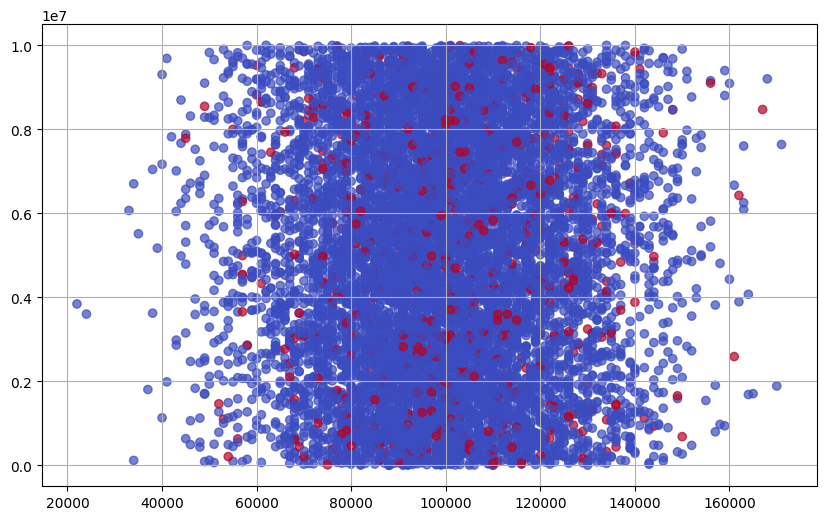

In [7]:
cor(df['Доход в месяц'], df['Сумма текущего кредита'], df['default'])

In [8]:
old_data['Дефолт'] = df['default']
old_data.to_csv('data.csv', index=False)
old_data

,Возраст,Пол,В браке,Количество детей,Уровень образования,Доход в месяц,Тип занятости,Стаж на текущем месте работы (лет),Общий трудовой стаж (лет),Тип жилья,...,Частота смены места работы за последние 5 лет,"Наличие других займов (например, микрозаймы)",Наличие загранпаспорта,Частота поездок за границу за последние 5 лет,Наличие недвижимости кроме основного жилья,Оценка стоимости всего имущества,Уровень финансовой грамотности,Платеж по текущему кредиту в месяц,Количество сданных лаб по информатике,Дефолт
0,47,Женщина,Да,2,Колледж,79000,ООО,6,24,Ипотека,...,10,3,Нет,2,3,5965000,Высокий,21000,3,False
1,20,Женщина,Нет,6,Школа - 11,89000,ИП,0,1,Арендованное,...,3,10,Да,12,10,9143000,Средний,4000,3,False
2,33,Женщина,Нет,6,Колледж,121000,Нет работы,1,2,Арендованное,...,10,9,Нет,19,8,4899000,Средний,30000,4,False
3,60,Женщина,Нет,1,Школа - 11,106000,ИП,9,42,Арендованное,...,5,4,Нет,17,6,9208000,Низкий,98000,2,False
4,33,Мужчина,Да,1,Нет,88000,ИП,12,12,Арендованное,...,1,5,Да,18,10,7882000,Средний,22000,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,70,Мужчина,Да,4,Аспирант,102000,ООО,13,32,Арендованное,...,5,8,Нет,4,2,7593000,Высокий,61000,0,True
9996,23,Мужчина,Нет,2,Колледж,135000,ИП,1,4,Арендованное,...,3,6,Да,12,6,8887000,Средний,71000,2,True
9997,22,Женщина,Да,2,Нет,70000,ИП,1,3,Ипотека,...,9,9,Нет,18,5,11288000,Средний,50000,2,False
9998,34,Женщина,Да,0,Школа - 11,118000,Постоянная работа,3,7,Собственное,...,0,0,Нет,12,4,13918000,Низкий,68000,4,False
